In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder
from palettable.colorbrewer import qualitative
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting

from matplotlib.colors import Normalize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, precision_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder , normalize

import time
from tqdm import tqdm

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

from matplotlib import pyplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Metric functions

In [3]:

# Make the confusion matrix
def confusion_plot(y_test,y_pred,title):
    cmt = confusion_matrix(y_test,y_pred)
    plt.rcParams['figure.figsize'] = (10,8)
    sns.heatmap(cmt,fmt='',annot=True,linewidth=0.01,cmap=sns.cubehelix_palette(as_cmap=True))
    plt.title("confusion matrix {}".format(title))
    plt.xlabel("predicted")
    plt.ylabel("true")
    plt.show()


# generate classification report
def generate_classification_report(y_test,y_pred):
    report=pd.DataFrame.from_dict(classification_report(y_pred,y_test,output_dict=True)).T
    # report['Label']=[data_classes[i]  if i<5 else " " for i,x in enumerate(report.index)]
    report=report[['f1-score','precision','recall','support']]
    pd.set_option('display.max_rows', report.shape[0]+1)
    return report

# ROC Curve
def plot_roc_curve(y_test,proba,pos_label):
    fpr, tpr, thresholds = roc_curve(y_test, proba[:,pos_label], pos_label= pos_label)
    roc_auc = roc_auc_score(y_test, proba, multi_class='ovr')

    plt.rcParams['figure.figsize'] = (5,4)
    plt.plot(fpr, tpr,'k:',lw=5, label='average ROC curve (area = {0:0.2f})'.format(roc_auc))
    plt.plot([0 ,1],[0 ,1],'r')
    plt.legend(loc="lower right")
    # plt.title('ROC Curve for calss {0}'.format(data_classes[pos_label]))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


# ROC Curve for all classes
def plot_roc_curve_all(y_test,proba,n_class,title):
    for i in range(n_class):
      fpr, tpr, thresholds = roc_curve(y_test, proba[:,i],pos_label= i)
      plt.plot(fpr, tpr,lw=1)
    plt.plot([0 ,1],[0 ,1],'r')
    plt.title('ROC Curve for all classes in {}'.format(title))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    # plt.legend(data_classes)
    plt.show()

# Function to extract floor number, X coordinate, and Y coordinate
def extract_info(y):
    parts = y.split('-')
    floor = int(parts[0][1:])  # Extract floor number
    x_coord = float(parts[1])  # Extract X coordinate
    y_coord = float(parts[2])  # Extract Y coordinate
    return floor, x_coord, y_coord

# Calculate average error for each floor
def calculate_avg_error(y_test, y_pred, verbose = 1):
    errors = {}
    counts = {}
    for y_t, y_p in zip(y_test, y_pred):
        floor_t, x_t, y_t = extract_info(y_t)
        floor_p, x_p, y_p = extract_info(y_p)
        error = np.sqrt((x_t - x_p)**2 + (y_t - y_p)**2)
        errors.setdefault(floor_t, []).append(error)
        counts.setdefault(floor_t, 0)
        counts[floor_t] += 1

    avg_errors = {floor: sum(errors[floor]) / counts[floor] for floor in errors}

    if verbose == 1:
        print("Average errors for each floor:")
        for floor, error in avg_errors.items():
            print(f"Floor {floor}: {error}")
        print(f"Average: {sum(avg_errors.values())/3}")
    return sum(avg_errors.values())/3

# Calculate average error for each floor
def calculate_mse(y_test, y_pred, verbose = 1):
    errors = {}
    counts = {}
    for y_t, y_p in zip(y_test, y_pred):
        floor_t, x_t, y_t = extract_info(y_t)
        floor_p, x_p, y_p = extract_info(y_p)
        error = (x_t - x_p)**2 + (y_t - y_p)**2
        errors.setdefault(floor_t, []).append(error)
        counts.setdefault(floor_t, 0)
        counts[floor_t] += 1

    mse_errors = {floor: sum(errors[floor]) / counts[floor] for floor in errors}
    if verbose == 1:
        print("\nMSE for each floor:")
        for floor, error in mse_errors.items():
            print(f"Floor {floor}: {error}")
        print(f"Average: {sum(mse_errors.values())/3}")
    return sum(mse_errors.values())/3

# Calculate average error for each floor
def calculate_rmse(y_test, y_pred, verbose = 1):
    errors = {}
    counts = {}
    for y_t, y_p in zip(y_test, y_pred):
        floor_t, x_t, y_t = extract_info(y_t)
        floor_p, x_p, y_p = extract_info(y_p)
        error = (x_t - x_p)**2 + (y_t - y_p)**2
        errors.setdefault(floor_t, []).append(error)
        counts.setdefault(floor_t, 0)
        counts[floor_t] += 1

    rmse_errors = {floor: np.sqrt(sum(errors[floor]) / counts[floor]) for floor in errors}
    if verbose == 1:
        print("\nRMSE for each floor:")
        for floor, error in rmse_errors.items():
            print(f"Floor {floor}: {error}")
        print(f"Average: {sum(rmse_errors.values())/3}")
    return sum(rmse_errors.values())/3

# Import Dataset

In [4]:
tr_path = "C://Users/Hamid/content/JUIndoorLoc-Training-data.csv"
ts_path = "C://Users/Hamid/content/JUIndoorLoc-Test-data.csv"

# tr_path = "/content/JUIndoorLoc-Training-data.csv"
# ts_path = "/content/JUIndoorLoc-Test-data.csv"

In [5]:
data_train = pd.read_csv(tr_path)
data_train.head(5)
data_test = pd.read_csv(ts_path)
data_test.head(5)

,Cid,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr,Did,Ts
0,L4-33-13,-77,-58,-66,-64,-92,-66,-66,-93,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489813137748
1,L4-33-13,-90,-58,-78,-56,-92,-74,-74,-87,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489813179138
2,L4-33-13,-80,-64,-78,-56,-92,-74,-74,-87,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489812948443
3,L4-33-13,-72,-60,-74,-58,-93,-75,-76,-95,-93,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489812959103
4,L4-33-13,-82,-56,-74,-56,-93,-71,-76,-89,-110,...,-110,-110,-110,-110,-110,-110,0,0,D2,1489813079167


In [6]:
frames = [data_train, data_test]
df = pd.concat(frames)
df['Did'] = df['Did'].astype(str).str[1]
df['Did'] = pd.to_numeric(df['Did'])
df.head(5)

,Cid,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,...,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr,Did,Ts
0,L4-40-1,-84,-80,-71,-58,-110,-72,-71,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,4,1469870570949
1,L4-40-1,-84,-79,-71,-58,-110,-72,-71,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,4,1470047205646
2,L4-40-1,-110,-110,-70,-56,-110,-69,-68,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,4,1469870932338
3,L4-40-1,-110,-110,-70,-53,-110,-69,-68,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,4,1470047629440
4,L4-37-2,-84,-82,-75,-65,-110,-73,-75,-110,-110,...,-110,-110,-110,-110,-110,-110,0,1,4,1469876622694


In [7]:
data_combined = df.drop('Cid', axis=1).reset_index(drop=True)
data_combined = data_combined.drop('Ts', axis=1)
data_combined.head(20)

,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,AP010,...,AP166,AP167,AP168,AP169,AP170,AP171,AP172,Rs,Hpr,Did
0,-84,-80,-71,-58,-110,-72,-71,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
1,-84,-79,-71,-58,-110,-72,-71,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
2,-110,-110,-70,-56,-110,-69,-68,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
3,-110,-110,-70,-53,-110,-69,-68,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
4,-84,-82,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
5,-84,-81,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
6,-84,-80,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
7,-85,-80,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
8,-84,-80,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4
9,-84,-80,-75,-65,-110,-73,-75,-110,-110,-110,...,-110,-110,-110,-110,-110,-110,-110,0,1,4


In [8]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data_combined)
y = df.Cid

le = LabelEncoder()
le.fit(y)
le.transform(y)

X_train, Xt, y_train, yt = train_test_split(data_combined, y, test_size=0.2, shuffle=True, random_state=41)

y_train_encode =  le.transform(y_train)

y_test_encode = le.transform(yt)

X_test = Xt

In [12]:
cov_data = np.cov(X_train, rowvar=False)

In [13]:
from scipy import linalg
U, s, Vh = linalg.svd(cov_data)

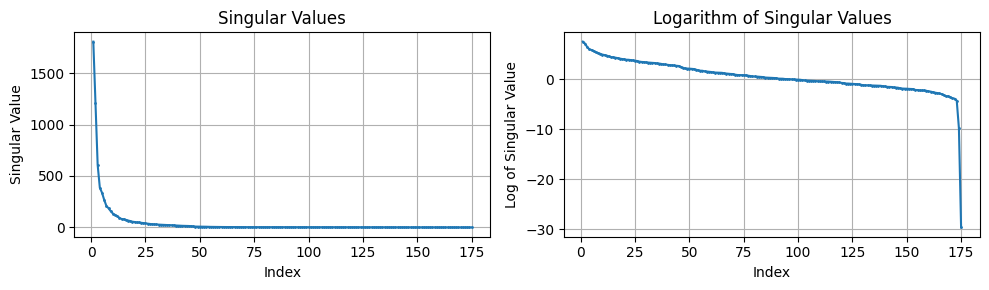

In [65]:
# Plot singular values
plt.figure(figsize=(10, 3))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(range(1, len(s) + 1), s, marker='o', linestyle='-', markersize=1) # Decrease markersize
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.grid(True)

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(range(1, len(s) + 1), np.log(s), marker='o', linestyle='-', markersize=1) # Decrease markersize
plt.title('Logarithm of Singular Values')
plt.xlabel('Index')
plt.ylabel('Log of Singular Value')
plt.grid(True)

plt.tight_layout()
# Save the plot as PNG
plt.savefig('svd.png')

# Save the plot as SVG
plt.savefig('svd.svg')
plt.show()
plt.show()

# PCA 1

In [11]:
pca = PCA(n_components=1)
# data_pca = pca.fit_transform(X)

In [12]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_train = pca.fit_transform(X_train)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=2,
    n_jobs=-1  # Utilize all available CPU cores
)
rf_model.fit(pca_train, y_train_encode)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"train time: {elapsed_time}")

train time: 22.27403163909912


In [13]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_test = pca.transform(X_test)
y_pred = rf_model.predict(pca_test)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"test time: {elapsed_time}")

yp = le.inverse_transform(y_pred)
yp = pd.Series(yp)

test time: 3.909377098083496


In [16]:
f1 = f1_score(yt, yp, average='weighted')
recall = recall_score(yt, yp, average='weighted')
precision = precision_score(yt, yp, average='weighted')
accuracy = accuracy_score(yt, yp)

print("F1-score:", f1*100)
print("Recall:", recall*100)
print("Precision:", precision*100)
print("Accuracy:", accuracy*100)

F1-score: 50.48716145886733
Recall: 50.69978316577962
Precision: 55.15624850281504
Accuracy: 50.69978316577962


In [17]:
# Calculate average error for each floor
calculate_avg_error(yt, yp)
calculate_mse(yt, yp)
calculate_rmse(yt, yp)

Average errors for each floor:
Floor 5: 6.294324100806115
Floor 4: 5.442987772806861
Floor 3: 6.09583420375273
Average: 5.944382025788568

MSE for each floor:
Floor 5: 126.23024054982818
Floor 4: 86.74666666666667
Floor 3: 62.553333333333335
Average: 91.8434135166094

RMSE for each floor:
Floor 5: 11.23522320872301
Floor 4: 9.313789060670564
Floor 3: 7.909066527304808
Average: 9.486026265566126


9.486026265566126

# PCA 2

In [19]:
pca = PCA(n_components=2)
# data_pca = pca.fit_transform(X)

In [20]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_train = pca.fit_transform(X_train)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=2,
    n_jobs=-1  # Utilize all available CPU cores
)
rf_model.fit(pca_train, y_train_encode)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"train time: {elapsed_time}")

train time: 18.490355730056763


In [21]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_test = pca.transform(X_test)
y_pred = rf_model.predict(pca_test)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"test time: {elapsed_time}")

yp = le.inverse_transform(y_pred)
yp = pd.Series(yp)

test time: 2.252260684967041


In [22]:
f1 = f1_score(yt, yp, average='weighted')
recall = recall_score(yt, yp, average='weighted')
precision = precision_score(yt, yp, average='weighted')
accuracy = accuracy_score(yt, yp)

print("F1-score:", f1*100)
print("Recall:", recall*100)
print("Precision:", precision*100)
print("Accuracy:", accuracy*100)

F1-score: 70.48827170400249
Recall: 70.72738024837373
Precision: 74.05659094590023
Accuracy: 70.72738024837373


In [23]:
# Calculate average error for each floor
calculate_avg_error(yt, yp)
calculate_mse(yt, yp)
calculate_rmse(yt, yp)

Average errors for each floor:
Floor 5: 2.0146426547603893
Floor 4: 2.014566728870596
Floor 3: 5.128170650725234
Average: 3.052460011452073

MSE for each floor:
Floor 5: 22.95647193585338
Floor 4: 22.43717948717949
Floor 3: 56.26
Average: 33.88455047434429

RMSE for each floor:
Floor 5: 4.791291259760085
Floor 4: 4.7367899982139265
Floor 3: 7.500666637039671
Average: 5.676249298337894


5.676249298337894

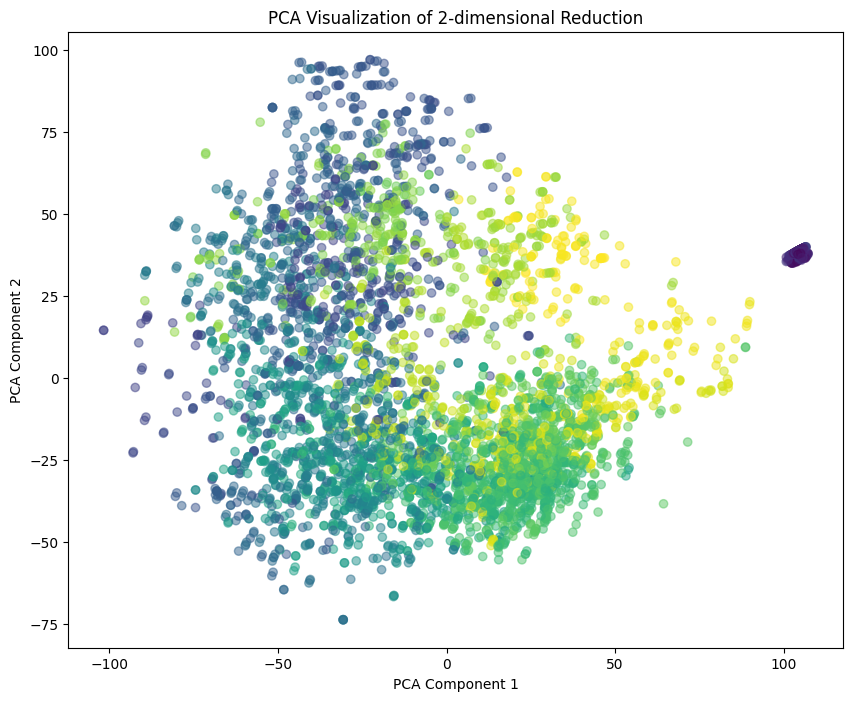

In [28]:
# Convert categorical 'y' values to numerical labels
label_encoder = LabelEncoder()
df['Cid_encoded'] = label_encoder.fit_transform(df['Cid'])

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_test[:, 0], pca_test[:, 1], c=y_test_encode, alpha=0.5)


plt.title('PCA Visualization of 2-dimensional Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# Save the plot as PNG
plt.savefig('PCA2.png')

# Save the plot as SVG
plt.savefig('PCA2.svg')
plt.show()

# PCA 3

In [30]:
pca = PCA(n_components=3)
# data_pca = pca.fit_transform(X)

In [31]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_train = pca.fit_transform(X_train)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=2,
    n_jobs=-1  # Utilize all available CPU cores
)
rf_model.fit(pca_train, y_train_encode)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"train time: {elapsed_time}")

train time: 18.325349807739258


In [32]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_test = pca.transform(X_test)
y_pred = rf_model.predict(pca_test)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"test time: {elapsed_time}")

yp = le.inverse_transform(y_pred)
yp = pd.Series(yp)

test time: 2.585731029510498


In [33]:
f1 = f1_score(yt, yp, average='weighted')
recall = recall_score(yt, yp, average='weighted')
precision = precision_score(yt, yp, average='weighted')
accuracy = accuracy_score(yt, yp)

print("F1-score:", f1*100)
print("Recall:", recall*100)
print("Precision:", precision*100)
print("Accuracy:", accuracy*100)

F1-score: 88.77476571152441
Recall: 88.94145476049675
Precision: 90.51701746276879
Accuracy: 88.94145476049675


In [34]:
# Calculate average error for each floor
calculate_avg_error(yt, yp)
calculate_mse(yt, yp)
calculate_rmse(yt, yp)

Average errors for each floor:
Floor 5: 0.7604223242017634
Floor 4: 0.30993216697961345
Floor 3: 5.001035258608289
Average: 2.023796583263222

MSE for each floor:
Floor 5: 10.207331042382588
Floor 4: 2.698974358974359
Floor 3: 52.67
Average: 21.85876846711898

RMSE for each floor:
Floor 5: 3.1948913975881226
Floor 4: 1.6428555502460827
Floor 3: 7.25741000633146
Average: 4.031718984721889


4.031718984721889

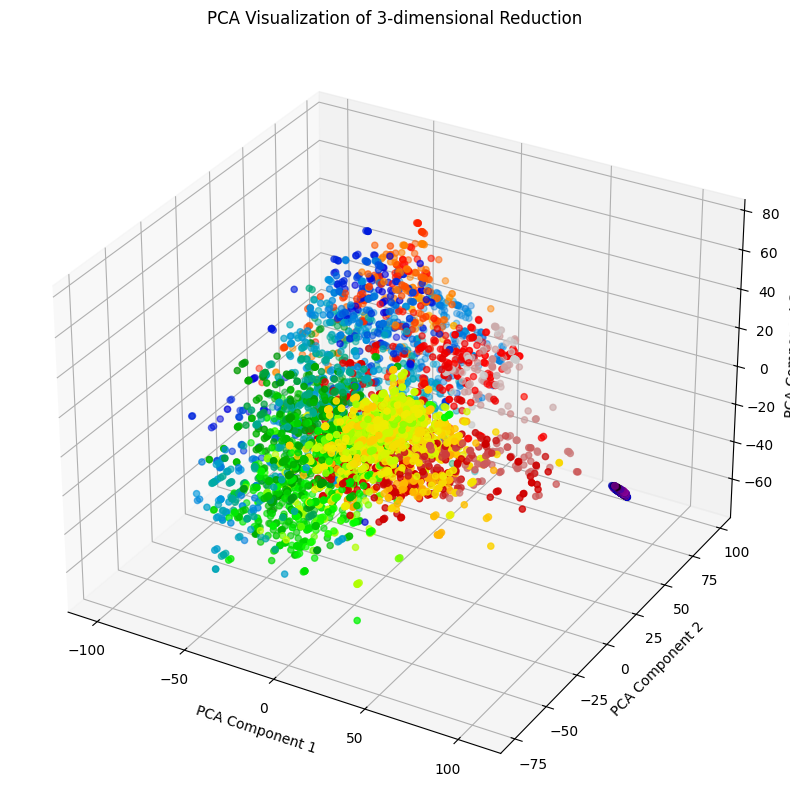

In [38]:
# Assuming 'data_tsne' has 3 components for t-SNE
data_pca_3d = pca_test  # Replace with your 3D t-SNE data


# Choose a high-contrast color palette (e.g., Set1 from seaborn)
color_palette = sns.color_palette("Set1", len(label_encoder.classes_))

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_pca_3d[:, 0],
    data_pca_3d[:, 1],
    data_pca_3d[:, 2],
    c=y_test_encode,
    cmap='nipy_spectral',  # Use seaborn color palette directly
)


ax.set_title('PCA Visualization of 3-dimensional Reduction')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Save the plot as PNG
plt.savefig('PCA3.png')

# Save the plot as SVG
plt.savefig('PCA3.svg')

plt.show()

# PCA 10

In [38]:
pca = PCA(n_components=10)
# data_pca = pca.fit_transform(X)

In [39]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_train = pca.fit_transform(X_train)
rf_model = RandomForestClassifier(
    n_estimators=40,
    random_state=42,
    min_samples_split=2,
    n_jobs=-1  # Utilize all available CPU cores
)
rf_model.fit(pca_train, y_train_encode)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"train time: {elapsed_time}")

train time: 19.389851331710815


In [46]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_test = pca.transform(X_test)
y_pred = rf_model.predict(pca_test)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"test time: {elapsed_time}")

yp = le.inverse_transform(y_pred)
yp = pd.Series(yp)

test time: 0.830256462097168


In [42]:
f1 = f1_score(yt, yp, average='weighted')
recall = recall_score(yt, yp, average='weighted')
precision = precision_score(yt, yp, average='weighted')
accuracy = accuracy_score(yt, yp)

print("F1-score:", f1*100)
print("Recall:", recall*100)
print("Precision:", precision*100)
print("Accuracy:", accuracy*100)

F1-score: 92.50188710742965
Recall: 92.68677311255668
Precision: 93.49942996749618
Accuracy: 92.68677311255668


In [34]:
# Calculate average error for each floor
calculate_avg_error(yt, yp)
calculate_mse(yt, yp)
calculate_rmse(yt, yp)

Average errors for each floor:
Floor 5: 0.7604223242017634
Floor 4: 0.30993216697961345
Floor 3: 5.001035258608289
Average: 2.023796583263222

MSE for each floor:
Floor 5: 10.207331042382588
Floor 4: 2.698974358974359
Floor 3: 52.67
Average: 21.85876846711898

RMSE for each floor:
Floor 5: 3.1948913975881226
Floor 4: 1.6428555502460827
Floor 3: 7.25741000633146
Average: 4.031718984721889


4.031718984721889

## Adaboost

In [47]:
pca = PCA(n_components=10)
# data_pca = pca.fit_transform(X)

In [49]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_train = pca.fit_transform(X_train)
base_estimator = DecisionTreeClassifier(max_depth=None, random_state=42)
ada_model = AdaBoostClassifier(
    n_estimators=40,
    estimator=base_estimator,
    algorithm='SAMME',
    random_state=42,
)
ada_model.fit(pca_train, y_train_encode)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"train time: {elapsed_time}")

train time: 403.4537773132324


In [50]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_test = pca.transform(X_test)
y_pred = ada_model.predict(pca_test)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"test time: {elapsed_time}")

yp = le.inverse_transform(y_pred)
yp = pd.Series(yp)

test time: 2.0180740356445312


In [51]:
f1 = f1_score(yt, yp, average='weighted')
recall = recall_score(yt, yp, average='weighted')
precision = precision_score(yt, yp, average='weighted')
accuracy = accuracy_score(yt, yp)

print("F1-score:", f1*100)
print("Recall:", recall*100)
print("Precision:", precision*100)
print("Accuracy:", accuracy*100)

F1-score: 91.27820633498675
Recall: 91.38576779026218
Precision: 92.54551666695542
Accuracy: 91.38576779026218


In [52]:
# Calculate average error for each floor
calculate_avg_error(yt, yp)
calculate_mse(yt, yp)
calculate_rmse(yt, yp)

Average errors for each floor:
Floor 5: 0.32417803851975624
Floor 4: 0.17592010529381194
Floor 3: 3.8291392634007413
Average: 1.4430791357381032

MSE for each floor:
Floor 5: 3.3424971363115694
Floor 4: 1.7074358974358974
Floor 3: 34.65
Average: 13.233311011249155

RMSE for each floor:
Floor 5: 1.8282497467008083
Floor 4: 1.3066889061425055
Floor 3: 5.886425061104575
Average: 3.0071212379826293


3.0071212379826293

## XGBoost

In [53]:
pca = PCA(n_components=10)
# data_pca = pca.fit_transform(X)

In [60]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_train = pca.fit_transform(X_train)
xgb_model = XGBClassifier(
    # device = "cuda",
    n_estimators=40,
    random_state=42,
    n_jobs=-1  # Utilize all available CPU cores
)
xgb_model.fit(pca_train, y_train_encode)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"train time: {elapsed_time}")

train time: 32.312291860580444


In [61]:
# Make predictions on the test set
start_time = time.time()  # Record the start time
pca_test = pca.transform(X_test)
y_pred = xgb_model.predict(pca_test)

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate elapsed time
print(f"test time: {elapsed_time}")

yp = le.inverse_transform(y_pred)
yp = pd.Series(yp)

test time: 0.7675507068634033


In [62]:
f1 = f1_score(yt, yp, average='weighted')
recall = recall_score(yt, yp, average='weighted')
precision = precision_score(yt, yp, average='weighted')
accuracy = accuracy_score(yt, yp)

print("F1-score:", f1*100)
print("Recall:", recall*100)
print("Precision:", precision*100)
print("Accuracy:", accuracy*100)

F1-score: 88.02593268923013
Recall: 88.2909520993495
Precision: 89.43376543575557
Accuracy: 88.2909520993495


In [63]:
# Calculate average error for each floor
calculate_avg_error(yt, yp)
calculate_mse(yt, yp)
calculate_rmse(yt, yp)

Average errors for each floor:
Floor 5: 0.4467235196772519
Floor 4: 0.28434215767616533
Floor 3: 4.111267135135253
Average: 1.6141109374962233

MSE for each floor:
Floor 5: 3.627720504009164
Floor 4: 2.5443589743589743
Floor 3: 34.693333333333335
Average: 13.621804270567159

RMSE for each floor:
Floor 5: 1.9046575818264981
Floor 4: 1.5951046907206354
Floor 3: 5.8901046962964365
Average: 3.12995565628119


3.12995565628119

# PCA Range

In [44]:
ranges = [1, 2, 3, 5, 10, 25, 50, 75, 100]

In [25]:
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []
avg_errors = []
mse_values = []
rmse_values = []
elapsed_times = []
for r in tqdm(range(1,101)):
    pca = PCA(n_components=r)
    # Make predictions on the test set
    start_time = time.time()  # Record the start time
    pca_train = pca.fit_transform(X_train)
    rf_model = RandomForestClassifier(
        n_estimators=40,
        random_state=42,
        min_samples_split=2,
        n_jobs=-1  # Utilize all available CPU cores
    )
    rf_model.fit(pca_train, y_train_encode)
    
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"train time: {elapsed_time}")

    # Make predictions on the test set
    start_time = time.time()  # Record the start time
    pca_test = pca.transform(X_test)
    y_pred = rf_model.predict(pca_test)
    
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"test time: {elapsed_time}")
    elapsed_time = end_time - start_time  # Calculate elapsed time
    elapsed_times.append(elapsed_time)
    
    # Calculate evaluation metrics
    yp = le.inverse_transform(y_pred)
    yp = pd.Series(yp)
    f1 = f1_score(yt, yp, average='weighted')
    recall = recall_score(yt, yp, average='weighted')
    precision = precision_score(yt, yp, average='weighted')
    accuracy = accuracy_score(yt, yp)
    avg_error = calculate_avg_error(yt, yp, verbose=0)
    mse = calculate_mse(yt, yp, verbose=0)
    rmse = calculate_rmse(yt, yp, verbose=0)

    # Append metrics to respective lists
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    avg_errors.append(avg_error)
    mse_values.append(mse)
    rmse_values.append(rmse)

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

train time: 7.988441705703735


  1%|▊                                                                                 | 1/100 [00:09<14:55,  9.05s/it]

test time: 0.9027321338653564
train time: 6.654660940170288


  2%|█▋                                                                                | 2/100 [00:16<13:28,  8.25s/it]

test time: 0.876676082611084
train time: 6.542330980300903


  3%|██▍                                                                               | 3/100 [00:24<12:49,  7.93s/it]

test time: 0.874793291091919
train time: 11.358811616897583


  4%|███▎                                                                              | 4/100 [00:36<15:30,  9.69s/it]

test time: 0.8809106349945068
train time: 11.776152610778809


  5%|████                                                                              | 5/100 [00:49<17:06, 10.81s/it]

test time: 0.8490571975708008
train time: 12.03613543510437


  6%|████▉                                                                             | 6/100 [01:02<18:08, 11.58s/it]

test time: 0.8876147270202637
train time: 12.789787292480469


  7%|█████▋                                                                            | 7/100 [01:16<19:05, 12.32s/it]

test time: 0.8799710273742676
train time: 12.80373239517212


  8%|██████▌                                                                           | 8/100 [01:30<19:37, 12.80s/it]

test time: 0.8901777267456055
train time: 20.519752025604248


  9%|███████▍                                                                          | 9/100 [01:51<23:34, 15.54s/it]

test time: 0.9053125381469727
train time: 19.926911115646362


 10%|████████                                                                         | 10/100 [02:12<25:50, 17.23s/it]

test time: 0.9108335971832275
train time: 19.670086145401


 11%|████████▉                                                                        | 11/100 [02:33<27:07, 18.29s/it]

test time: 0.8704817295074463
train time: 19.91982126235962


 12%|█████████▋                                                                       | 12/100 [02:54<27:58, 19.08s/it]

test time: 0.8232057094573975
train time: 20.98799419403076


 13%|██████████▌                                                                      | 13/100 [03:16<28:58, 19.98s/it]

test time: 0.9040648937225342
train time: 21.46109938621521


 14%|███████████▎                                                                     | 14/100 [03:38<29:43, 20.74s/it]

test time: 0.8875687122344971
train time: 23.087002277374268


 15%|████████████▏                                                                    | 15/100 [04:03<30:51, 21.78s/it]

test time: 0.9378011226654053
train time: 31.013915061950684


 16%|████████████▉                                                                    | 16/100 [04:35<34:49, 24.88s/it]

test time: 0.9151749610900879
train time: 31.24885582923889


 17%|█████████████▊                                                                   | 17/100 [05:07<37:29, 27.10s/it]

test time: 0.8768982887268066
train time: 29.03954291343689


 18%|██████████████▌                                                                  | 18/100 [05:37<38:14, 27.98s/it]

test time: 0.8302085399627686
train time: 32.16547727584839


 19%|███████████████▍                                                                 | 19/100 [06:10<39:54, 29.56s/it]

test time: 0.9097354412078857
train time: 29.714879989624023


 20%|████████████████▏                                                                | 20/100 [06:41<39:52, 29.91s/it]

test time: 0.8842332363128662
train time: 30.026442289352417


 21%|█████████████████                                                                | 21/100 [07:12<39:51, 30.28s/it]

test time: 0.9459390640258789
train time: 32.75831055641174


 22%|█████████████████▊                                                               | 22/100 [07:46<40:44, 31.33s/it]

test time: 0.8836438655853271
train time: 31.854931592941284


 23%|██████████████████▋                                                              | 23/100 [08:19<40:48, 31.80s/it]

test time: 0.8909018039703369
train time: 31.58937644958496


 24%|███████████████████▍                                                             | 24/100 [08:51<40:35, 32.04s/it]

test time: 0.8452122211456299
train time: 44.1982581615448


 25%|████████████████████▎                                                            | 25/100 [09:37<44:59, 35.99s/it]

test time: 0.8593826293945312
train time: 43.45587682723999


 26%|█████████████████████                                                            | 26/100 [10:21<47:30, 38.52s/it]

test time: 0.8052897453308105
train time: 42.16645073890686


 27%|█████████████████████▊                                                           | 27/100 [11:04<48:34, 39.92s/it]

test time: 0.8631465435028076
train time: 46.11048436164856


 28%|██████████████████████▋                                                          | 28/100 [11:51<50:29, 42.08s/it]

test time: 0.8193967342376709
train time: 43.52205491065979


 29%|███████████████████████▍                                                         | 29/100 [12:36<50:39, 42.81s/it]

test time: 0.8411865234375
train time: 50.39227366447449


 30%|████████████████████████▎                                                        | 30/100 [13:27<52:59, 45.43s/it]

test time: 0.984215497970581
train time: 54.21932101249695


 31%|█████████████████████████                                                        | 31/100 [14:23<55:38, 48.39s/it]

test time: 0.9317395687103271
train time: 47.756948709487915


 32%|█████████████████████████▉                                                       | 32/100 [15:11<54:58, 48.51s/it]

test time: 0.8689241409301758
train time: 41.75455188751221


 33%|██████████████████████████▋                                                      | 33/100 [15:54<52:15, 46.80s/it]

test time: 0.924309492111206
train time: 45.875442028045654


 34%|███████████████████████████▌                                                     | 34/100 [16:41<51:31, 46.85s/it]

test time: 0.9225423336029053
train time: 45.53792929649353


 35%|████████████████████████████▎                                                    | 35/100 [17:28<50:40, 46.78s/it]

test time: 0.9376068115234375
train time: 56.104002237319946


 36%|█████████████████████████████▏                                                   | 36/100 [18:25<53:11, 49.87s/it]

test time: 0.8213856220245361
train time: 57.01851463317871


 37%|█████████████████████████████▉                                                   | 37/100 [19:23<54:56, 52.33s/it]

test time: 0.8635401725769043
train time: 60.19417643547058


 38%|██████████████████████████████▊                                                  | 38/100 [20:24<56:50, 55.00s/it]

test time: 0.8961336612701416
train time: 65.30228042602539


 39%|███████████████████████████████▌                                                 | 39/100 [21:31<59:23, 58.42s/it]

test time: 0.9473187923431396
train time: 59.367724895477295


 40%|████████████████████████████████▍                                                | 40/100 [22:31<59:01, 59.03s/it]

test time: 0.9041874408721924
train time: 66.9623441696167


 41%|████████████████████████████████▍                                              | 41/100 [23:39<1:00:42, 61.73s/it]

test time: 0.9042797088623047
train time: 65.46234560012817


 42%|█████████████████████████████████▏                                             | 42/100 [24:46<1:01:04, 63.17s/it]

test time: 0.9199590682983398
train time: 64.42456102371216


 43%|█████████████████████████████████▉                                             | 43/100 [25:51<1:00:40, 63.87s/it]

test time: 0.9188354015350342
train time: 59.13117957115173


 44%|███████████████████████████████████▋                                             | 44/100 [26:51<58:36, 62.80s/it]

test time: 1.021826982498169
train time: 63.48208260536194


 45%|████████████████████████████████████▍                                            | 45/100 [27:56<58:03, 63.33s/it]

test time: 0.9160816669464111
train time: 62.26011276245117


 46%|█████████████████████████████████████▎                                           | 46/100 [28:59<56:59, 63.32s/it]

test time: 0.880486249923706
train time: 62.46078944206238


 47%|██████████████████████████████████████                                           | 47/100 [30:03<55:58, 63.36s/it]

test time: 0.8376972675323486
train time: 67.97066712379456


 48%|██████████████████████████████████████▉                                          | 48/100 [31:12<56:22, 65.06s/it]

test time: 0.8949506282806396
train time: 84.39888095855713


 49%|██████████████████████████████████████▋                                        | 49/100 [32:37<1:00:29, 71.16s/it]

test time: 0.8303101062774658
train time: 74.35151505470276


 50%|███████████████████████████████████████▌                                       | 50/100 [33:53<1:00:20, 72.41s/it]

test time: 0.8258764743804932
train time: 74.62515020370483


 51%|█████████████████████████████████████████▎                                       | 51/100 [35:08<59:54, 73.37s/it]

test time: 0.8138644695281982
train time: 76.31755638122559


 52%|██████████████████████████████████████████                                       | 52/100 [36:25<59:37, 74.54s/it]

test time: 0.8020720481872559
train time: 69.56327557563782


 53%|██████████████████████████████████████████▉                                      | 53/100 [37:36<57:30, 73.41s/it]

test time: 1.034740924835205
train time: 74.9582028388977


 54%|███████████████████████████████████████████▋                                     | 54/100 [38:52<56:51, 74.16s/it]

test time: 0.7960350513458252


 54%|███████████████████████████████████████████▋                                     | 54/100 [39:11<33:23, 43.55s/it]


KeyboardInterrupt: 

In [28]:
data = {
    'F1 Score': f1_scores,
    'Recall': recall_scores,
    'Precision': precision_scores,
    'Accuracy': accuracy_scores,
    'Average Error': avg_errors,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'Elapsed Time': elapsed_times
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('PCA_RF2.csv', index=False)

In [36]:
df = pd.read_csv('PCA_RF2.csv')
ranges=range(1,55)
# Extract lists from DataFrame
f1_scores = df['F1 Score'].tolist()
recall_scores = df['Recall'].tolist()
precision_scores = df['Precision'].tolist()
accuracy_scores = df['Accuracy'].tolist()
avg_errors = df['Average Error'].tolist()
mse_values = df['MSE'].tolist()
rmse_values = df['RMSE'].tolist()
elapsed_times = df['Elapsed Time'].tolist()

In [35]:
len(f1_scores)

54

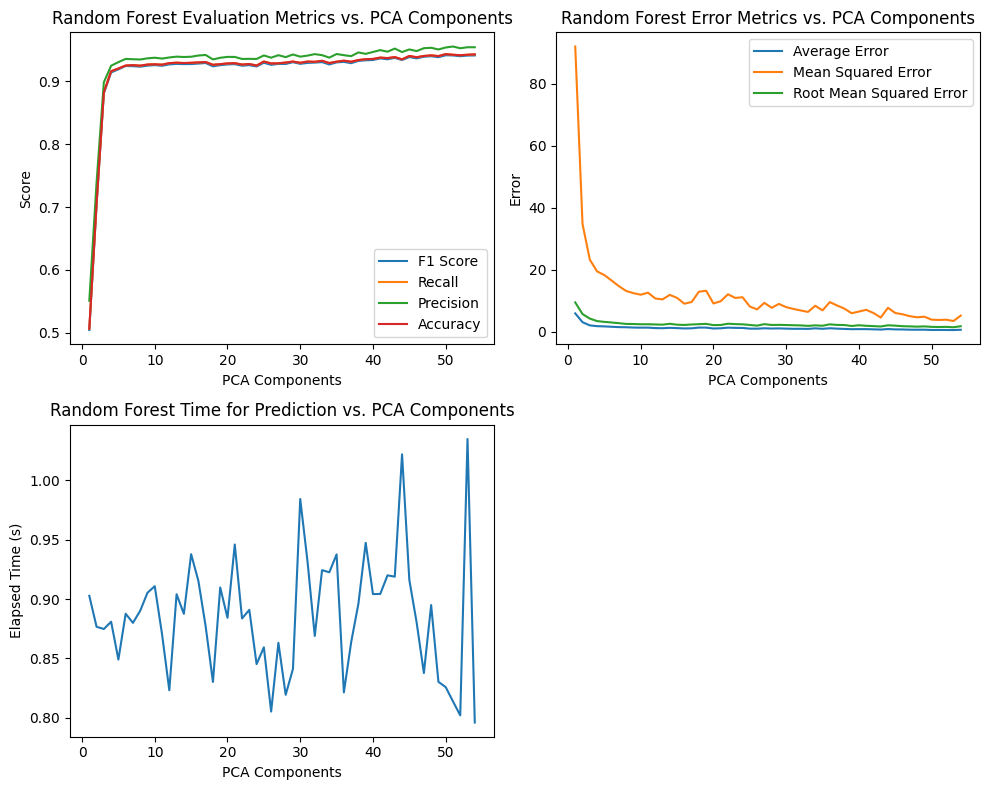

In [37]:
# Plot evaluation metrics
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(ranges, f1_scores, label='F1 Score')
plt.plot(ranges, recall_scores, label='Recall')
plt.plot(ranges, precision_scores, label='Precision')
plt.plot(ranges, accuracy_scores, label='Accuracy')
plt.xlabel('PCA Components')
plt.ylabel('Score')
plt.title('Random Forest Evaluation Metrics vs. PCA Components')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ranges, avg_errors, label='Average Error')
plt.plot(ranges, mse_values, label='Mean Squared Error')
plt.plot(ranges, rmse_values, label='Root Mean Squared Error')
plt.xlabel('PCA Components')
plt.ylabel('Error')
plt.title('Random Forest Error Metrics vs. PCA Components')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(ranges, elapsed_times)
plt.xlabel('PCA Components')
plt.ylabel('Elapsed Time (s)')
plt.title('Random Forest Time for Prediction vs. PCA Components')

plt.tight_layout()
plt.show()

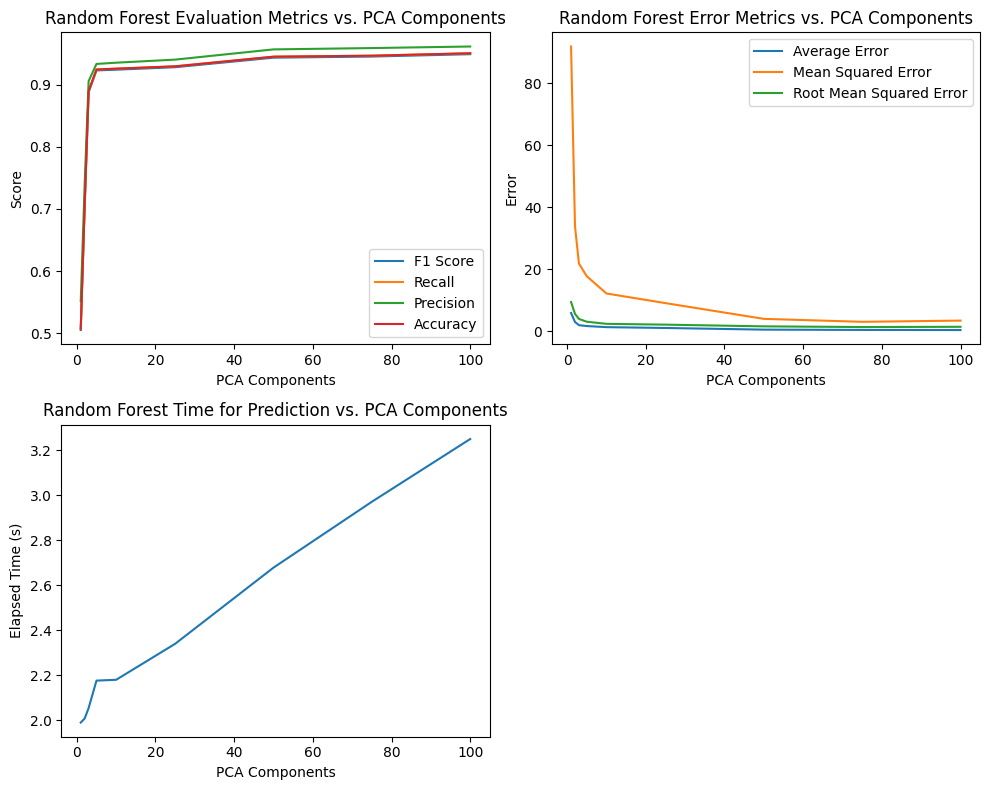

In [59]:
# Plot evaluation metrics
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(ranges, f1_scores, label='F1 Score')
plt.plot(ranges, recall_scores, label='Recall')
plt.plot(ranges, precision_scores, label='Precision')
plt.plot(ranges, accuracy_scores, label='Accuracy')
plt.xlabel('PCA Components')
plt.ylabel('Score')
plt.title('Random Forest Evaluation Metrics vs. PCA Components')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ranges, avg_errors, label='Average Error')
plt.plot(ranges, mse_values, label='Mean Squared Error')
plt.plot(ranges, rmse_values, label='Root Mean Squared Error')
plt.xlabel('PCA Components')
plt.ylabel('Error')
plt.title('Random Forest Error Metrics vs. PCA Components')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(ranges, elapsed_times)
plt.xlabel('PCA Components')
plt.ylabel('Elapsed Time (s)')
plt.title('Random Forest Time for Prediction vs. PCA Components')

plt.tight_layout()
plt.show()